## Deep learing project no.1

Marek Szydłowski 136633 <br>
Wotjek Tomczak 145467

In [112]:
import os
import re
from pathlib import Path

import pandas as pd
import numpy as np

import PIL
import cv2

from PIL import Image
from IPython.display import display
from sklearn.model_selection import train_test_split

In [2]:
DATA_PATH = 'data/256_ObjectCategories/'

In [3]:
# TODO: Add downloading files

In [4]:
data_check = Path(DATA_PATH)

assert data_check.exists(), "Please download the data first: vision.caltech.edu/Image_Datasets/Caltech256/256_ObjectCategories.tar"

In [5]:
img = cv2.imread(DATA_PATH + '001.ak47/001_0001.jpg')
img.shape

(278, 499, 3)

In [6]:
# animal kingdom here we come
animal_codes = np.array(
    [
        "007",
        "009",
        "024",
        "028",
        "034",
        "038",
        "040",
        "049",
        "052",
        "056",
        "057",
        "060",
        "064",
        "065",
        "080",
        "084",
        "085",
        "087",
        "089",
        "090",
        "093",
        "100",
        "105",
        "106",
        "111",
        "113",
        "114",
        "116",
        "121",
        "124",
        "129",
        "134",
        "150",
        "151",
        "152",
        "158",
        "164",
        "166",
        "168",
        "179",
        "186",
        "189",
        "190",
        "198",
        "201",
        "207",
        "228",
        "236",
        "250",
        "254",
        "256",
    ]
)

In [7]:
images = {}
for data_dir in Path(DATA_PATH).iterdir():
    num, _ = data_dir.name.split(".")
    if num in animal_codes:
        for f in data_dir.iterdir():
            if not f.is_file():
                continue

            if data_dir.name not in images:
                images[data_dir.name] = 1
            else:
                images[data_dir.name] += 1

df = (
    pd.DataFrame.from_dict(images, "index")
    .reset_index()
    .rename({0: "length", "index": "name"}, axis=1)
)

In [8]:
len(df)

51

In [9]:
median = df['length'].median()

# x < 90% median

In [10]:
modify_thershold = 0.1
df = df[
    df["length"].apply(lambda x: False if x < (1 - modify_thershold) * median else True)
]

df.loc[:, "to_trim"] = (
    df["length"]
    .apply(lambda x: True if x > (1 + modify_thershold) * median else False)
)

df = df.sort_values(by='length', ascending=False).reset_index(drop=True)

In [11]:
len(df)

35

In [12]:
df.head()

,name,length,to_trim
0,105.horse,270,True
1,090.gorilla,212,True
2,129.leopards-101,190,True
3,158.penguin,149,True
4,168.raccoon,140,True


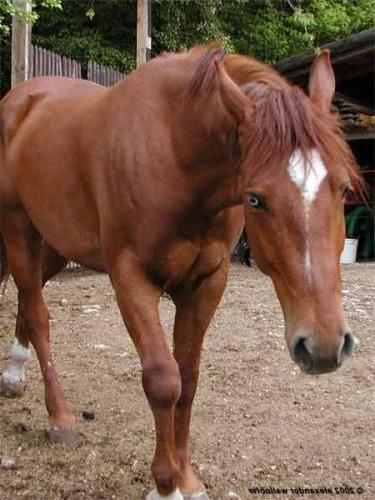

In [100]:
with Image.open(DATA_PATH + '105.horse/105_0260.jpg') as img:
    display(img)

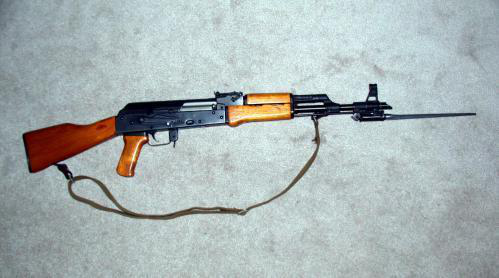

In [13]:
with Image.open(DATA_PATH + '001.ak47/001_0001.jpg') as img:
    display(img)

In [103]:
df.iloc[0]

name       105.horse
length           270
to_trim         True
Name: 0, dtype: object

In [104]:
horses = df.iloc[0]['name']
dataset = []
names = []
for horse in os.listdir(DATA_PATH + horses):
    img = cv2.imread(DATA_PATH + horses + '/' + horse)
    resized = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)

    dataset.append(resized)
    names.append(horse)

dataset = np.array(dataset)


In [101]:
horses

'105.horse'

In [72]:
dataset.shape

(270, 32, 32, 3)

In [82]:
d0 = dataset[0]
d0.shape

(32, 32, 3)

In [88]:
np.mean(d0, axis=(0, 1))

array([111.75878906, 138.11425781, 137.34179688])

In [91]:
bgr_mean = np.mean(dataset, axis=(0, 1, 2))
bgr_std = np.std(dataset, axis=(0, 1, 2))
bgr_mean, bgr_std

(array([109.70260417, 123.89941768, 129.73147063]),
 array([71.27606799, 67.88259988, 68.26495278]))

In [110]:
std_data = (dataset - bgr_mean) / bgr_std
std_data.shape

(270, 32, 32, 3)

In [108]:
# ind = names.index('105_0260.jpg')
# cv2.imshow('tmp', std_data[ind])
# cv2.waitKey(-1)
# cv2.destroyAllWindows()

In [117]:
X, Y = train_test_split(std_data, test_size=.3, random_state=23)

In [118]:
X.shape

(189, 32, 32, 3)

In [120]:
Y.shape

(81, 32, 32, 3)